In [3]:
from pylab import *
%matplotlib inline

# Segundo método (metodo de integración a segundo orden).



$$ y_ {n+1}=y_n + hf(x_n,y_n) + \frac{h^2}{2} \left(\frac{\partial f}{\partial x}+ \frac{\partial f}{\partial y}  f \right)$$



Donde $f$ y sus parciales estan evaluadas en $f(x_n,y_n)$

In [39]:


def segundo_orden(ec_diff,p_ini,t_final, ec_jac, h=0.1): # ec_jac son las parciales de f evaluadas en x0 y y0
    tiempo=arange(0,t_final+h, h)
    y=zeros(len(tiempo))
    y[0]=p_ini
    for i in range(len(tiempo)-1):
        y[i+1]= y[i] + h*ec_diff(y[i], tiempo[i]) # con esto tenemos el metodo de euler
        y[i+1] += 0.5*h*h*( ec_jac(y[i], tiempo[i])[0]) # componente 0 
        y[i+1] += 0.5*h*h*( ec_jac(y[i], tiempo[i])[1]) * (ec_diff(y[i], tiempo[i])) # componete 1 y la ecuacion diferencial
    
    return tiempo,y

In [28]:
def euler(ec_diff,p_ini,t_final,h=0.1): # definimos al integrador de euler
    tiempo=arange(0,t_final+h,h)   # debemos que crear el arreglo de intervalos de tiempo que esté relacionado con h de lo contrario el
    y=zeros(len(tiempo))
    y[0]=p_ini
    for i in range(len(tiempo)-1):
        y[i+1]=y[i] + h*ec_diff(y[i], tiempo[i]) 
    
    return tiempo,y   # te debe de regresar un arreglo del tiempo y de tu solición final

In [24]:
def ec_dif(y,x):
    return x*sin(y)

Ahora definimos la funcion que corresponde a la derivada de la función diferencial que  definimos anteriormente, esto corresponde al jacobiano


In [25]:
def d_ec_dif(y,x):
    return sin(y), x*cos(y)

In [26]:
d_ec_dif(pi/4,2)  # probando la funcionalidad de la ecuación diferenciable 


(0.70710678118654746, 1.4142135623730951)

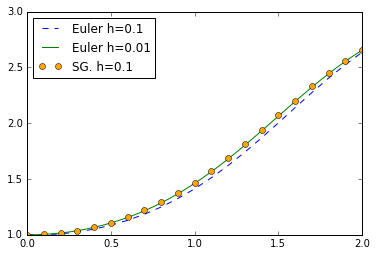

In [53]:
#x = linspace(0,4)# te da 50 terminos , si no indicas el numero de datos que quieres que te entregue

y_euler = euler(ec_dif,1,2)
y_euler_01= euler(ec_dif,1,2, 0.01) # modificamos el "paso"
plot(y_euler[0],y_euler[1],'--',label="Euler h=0.1")
plot(y_euler_01[0],y_euler_01[1],label="Euler h=0.01")

y_seg_met = segundo_orden(ec_dif,1,2,d_ec_dif)
plot(y_seg_met[0],y_seg_met[1],'o', color="orange",label="SG. h=0.1")
legend(loc=0)
show()

In [57]:
print y_seg_met[1][-1] - y_euler[1][-1]   # pide que nos entregue la diferencia de la columna solución y el último termino

0.0235061244662


In [55]:
a=(1,2,3)

In [56]:
a[-1] 

3